## Covid-19 Final Project

**Authors**: Jerry Shan, Joseph Pang, Michael Go



#### Question
Would it be possible to forecast the number of new cases on the next day based on historical data using linear modeling techniques?

In [1]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from IPython.display import Image
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

### Resouces and citations

- http://seaborn.pydata.org/tutorial/categorical.html
- https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

### Load all the datasets

We purposefully loaded the datasets in separate dataframes for it will allow us to individually analyze and preview the multiple datasets provided

Metadata for the `states.csv` table can be found at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

Listed Under: ```USA daily state reports csse_covid_19_daily_reports_us```

In [2]:
# Covid Related Data organized by primary key Province_State
states = pd.read_csv('4.18states.csv')
states.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-04-18 22:32:47  32.3182  -86.9023   
1          Alaska             US  2020-04-18 22:32:47  61.3707 -152.4044   
2  American Samoa             US                  NaN -14.2710 -170.1320   
3         Arizona             US  2020-04-18 22:32:47  33.7298 -111.4312   
4        Arkansas             US  2020-04-18 22:32:47  34.9697  -92.3731   

   Confirmed  Deaths  Recovered  Active  FIPS  Incident_Rate  People_Tested  \
0       4712     153        NaN  4559.0   1.0     100.492717        42538.0   
1        314       9      147.0   305.0   2.0      52.530410         9655.0   
2          0       0        NaN     NaN  60.0       0.000000            3.0   
3       4724     180      539.0  4544.0   4.0      64.901548        51045.0   
4       1744      38      703.0  1706.0   5.0      67.361213        24141.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0                620.0        3.247029  84000001  USA    907.206961   
1                 39.0        2.866242  84000002  USA   1615.226458   
2                  NaN             NaN        16  ASM      5.391708   
3                566.0        3.810330  84000004  USA    701.291175   
4                291.0        2.178899  84000005  USA    932.435235   

   Hospitalization_Rate  
0             13.157895  
1             12.420382  
2                   NaN  
3             11.981372  
4             16.685780

Metadata can be found at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data.

Listed under: ```Daily reports csse_covid_19_daily_reports``` separated by confirmed and deaths respectively

In [3]:
# Number of Confirmed Cases organized by primary key UID
confirmed_raw = pd.read_csv('time_series_covid19_confirmed_US.csv')
confirmed_raw

UID iso2 iso3  code3  FIPS          Admin2  \
0           16.0   AS  ASM     16  60.0             NaN   
1          316.0   GU  GUM    316  66.0             NaN   
2          580.0   MP  MNP    580  69.0             NaN   
3          630.0   PR  PRI    630  72.0             NaN   
4          850.0   VI  VIR    850  78.0             NaN   
...          ...  ...  ...    ...   ...             ...   
3256  84070016.0   US  USA    840   NaN    Central Utah   
3257  84070017.0   US  USA    840   NaN  Southeast Utah   
3258  84070018.0   US  USA    840   NaN  Southwest Utah   
3259  84070019.0   US  USA    840   NaN       TriCounty   
3260  84070020.0   US  USA    840   NaN    Weber-Morgan   

                Province_State Country_Region        Lat       Long_  ...  \
0               American Samoa             US -14.271000 -170.132000  ...   
1                         Guam             US  13.444300  144.793700  ...   
2     Northern Mariana Islands             US  15.097900  145.673900  ...   
3                  Puerto Rico             US  18.220800  -66.590100  ...   
4               Virgin Islands             US  18.335800  -64.896300  ...   
...                        ...            ...        ...         ...  ...   
3256                      Utah             US  39.372319 -111.575868  ...   
3257                      Utah             US  38.996171 -110.701396  ...   
3258                      Utah             US  37.854472 -111.441876  ...   
3259                      Utah             US  40.124915 -109.517442  ...   
3260                      Utah             US  41.271160 -111.914512  ...   

     4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  \
0          0        0        0        0       0       0       0       0   
1        141      141      141      145     145     145     145     145   
2         14       14       14       14      14      14      14      14   
3       1389     1400     1433     1539    1575    1757    1808    1843   
4         57       57       57       66      66      66      66      66   
...      ...      ...      ...      ...     ...     ...     ...     ...   
3256      22       22       22       23      23      23      24      25   
3257      13       13       14       12      13      15      11      11   
3258      89       91       93       98     101     103     111     119   
3259      11       11       11       13      13      13      14      14   
3260     148      148      151      158     162     166     167     167   

      5/5/20  5/6/20  
0          0       0  
1        145     149  
2         14      15  
3       1924    1968  
4         66      66  
...      ...     ...  
3256      25      26  
3257      12      12  
3258     121     128  
3259      14      14  
3260     173     173  

[3261 rows x 117 columns]

Metadata for `abriged_counties.csv` can be found at https://github.com/Yu-Group/covid19-severity-prediction/blob/master/data/list_of_columns.md.

In [4]:
abridged_counties = pd.read_csv('abridged_counties.csv')
abridged_counties.head()

countyFIPS  STATEFP  COUNTYFP CountyName StateName    State        lat  \
0      01001      1.0       1.0    Autauga        AL  Alabama  32.540091   
1      01003      1.0       3.0    Baldwin        AL  Alabama  30.738314   
2      01005      1.0       5.0    Barbour        AL  Alabama  31.874030   
3      01007      1.0       7.0       Bibb        AL  Alabama  32.999024   
4      01009      1.0       9.0     Blount        AL  Alabama  33.990440   

         lon  POP_LATITUDE  POP_LONGITUDE  ... >500 gatherings public schools  \
0 -86.645649     32.500389     -86.494165  ...        737497.0       737500.0   
1 -87.726272     30.548923     -87.762381  ...        737497.0       737500.0   
2 -85.397327     31.844036     -85.310038  ...        737497.0       737500.0   
3 -87.125260     33.030921     -87.127659  ...        737497.0       737500.0   
4 -86.562711     33.955243     -86.591491  ...        737497.0       737500.0   

   restaurant dine-in  entertainment/gym  federal guidelines  \
0            737503.0           737512.0            737500.0   
1            737503.0           737512.0            737500.0   
2            737503.0           737512.0            737500.0   
3            737503.0           737512.0            737500.0   
4            737503.0           737512.0            737500.0   

   foreign travel ban  SVIPercentile  HPSAShortage  HPSAServedPop  \
0            737495.0         0.4354           NaN            NaN   
1            737495.0         0.2162           NaN            NaN   
2            737495.0         0.9959          6.08         5400.0   
3            737495.0         0.6003          2.75        14980.0   
4            737495.0         0.4242          7.21        31850.0   

   HPSAUnderservedPop  
0                 NaN  
1                 NaN  
2             18241.0  
3              6120.0  
4             25233.0  

[5 rows x 87 columns]

Note that we didn't use the population estimate as provided in `abridged_counties.csv` because it's only for 2018, whereas the data that we have in the earlier datasets are for 2019. Therefore we will be using data from the 2019 US Census in order to get an estimation on the population.

Source: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html

In [5]:
# Uploading Census Data
us_census_raw = pd.read_excel('us_2019.xlsx')
us_census_raw.head()

table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)  \
0  Table 1. Annual Estimates of the Resident Popu...                                                             
1                                    Geographic Area                                                             
2                                                NaN                                                             
3                                      United States                                                             
4                                          Northeast                                                             

            Unnamed: 1      Unnamed: 2                          Unnamed: 3  \
0                  NaN             NaN                                 NaN   
1  2010-04-01 00:00:00             NaN  Population Estimate (as of July 1)   
2               Census  Estimates Base                                2010   
3            308745538       308758105                           309321666   
4             55317240        55318443                            55380134   

    Unnamed: 4   Unnamed: 5   Unnamed: 6   Unnamed: 7   Unnamed: 8  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2       2011.0       2012.0       2013.0       2014.0       2015.0   
3  311556874.0  313830990.0  315993715.0  318301008.0  320635163.0   
4   55604223.0   55775216.0   55901806.0   56006011.0   56034684.0   

    Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2       2016.0       2017.0       2018.0       2019.0  
3  322941311.0  324985539.0  326687501.0  328239523.0  
4   56042330.0   56059240.0   56046620.0   55982803.0

This table contains the land area of all the states and provinces.
Source: https://github.com/jakevdp/data-USstates/blob/master/state-areas.csv

In [6]:
state_areas = pd.read_csv('state-areas.csv').rename(columns={'state': 'Province_State', 'area (sq. mi)': 'Area'})
state_areas.head()

Province_State    Area
0        Alabama   52423
1         Alaska  656425
2        Arizona  114006
3       Arkansas   53182
4     California  163707

## Data Cleaning

### US Census Data
First, we need to extract the population data for all states from the `us_census` dataframe because it's very messy. According to the original excel document, the population estimate for 2019 is the last column:

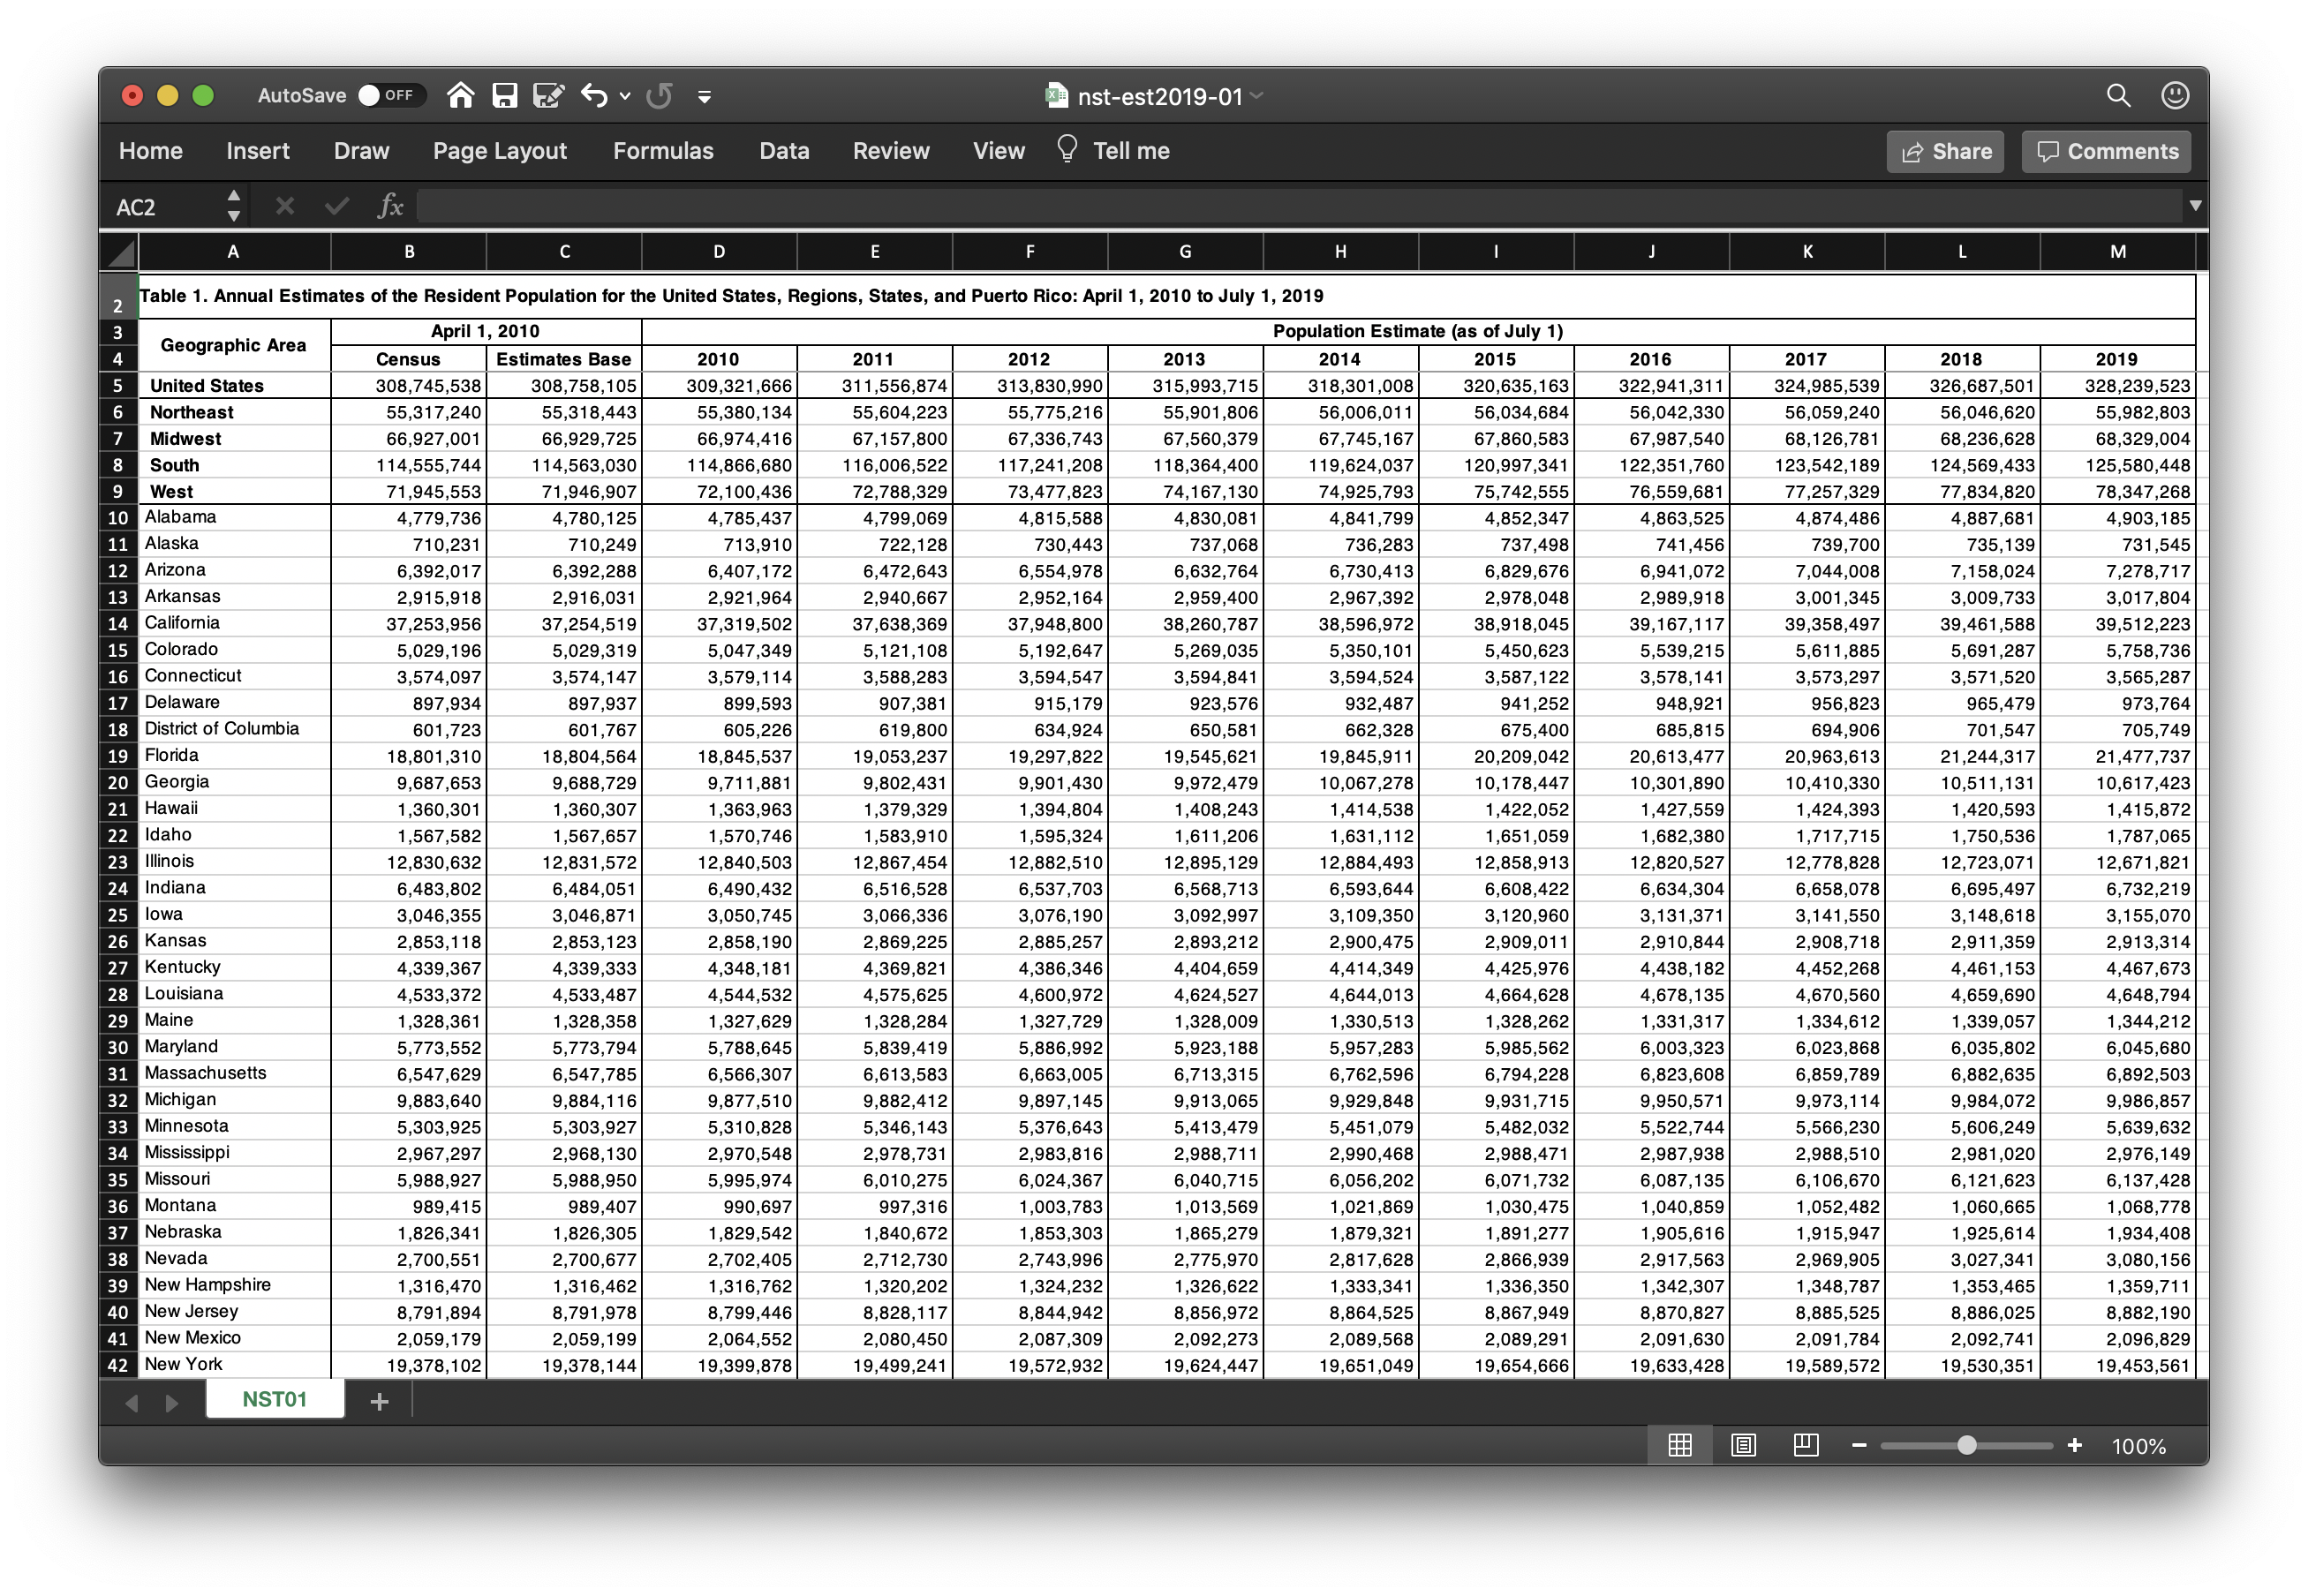

In [7]:
Image(filename='census_preview.png', width=1000)

In [8]:
# Here we extract only the 2019 data (because we want the most recent information). We also keep the province names.

us_2019_census_raw = us_census_raw.iloc[:, [0, 12]]
us_2019_census_raw

table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)  \
0   Table 1. Annual Estimates of the Resident Popu...                                                             
1                                     Geographic Area                                                             
2                                                 NaN                                                             
3                                       United States                                                             
4                                           Northeast                                                             
..                                                ...                                                             
61  Note: The estimates are based on the 2010 Cens...                                                             
62                                Suggested Citation:                                                             
63  Table 1. Annual Estimates of the Resident Popu...                                                             
64    Source: U.S. Census Bureau, Population Division                                                             
65                        Release Date: December 2019                                                             

    Unnamed: 12  
0           NaN  
1           NaN  
2        2019.0  
3   328239523.0  
4    55982803.0  
..          ...  
61          NaN  
62          NaN  
63          NaN  
64          NaN  
65          NaN  

[66 rows x 2 columns]

By Looking at the dataframe above, we can see that more cleaning is necessary. Next we will clean the data by renaming the columns and removing irrelevant rows:

In [9]:
# Renaming the columns and removing irrelevant rows:
us_2019_census = us_2019_census_raw.rename(columns={
        us_2019_census_raw.columns[0]: 'Region',
        us_2019_census_raw.columns[1]: 'Population'
    }).iloc[8:61].drop(59).set_index('Region').rename(lambda x: x[1:])
us_2019_census.head()

Population
Region                
Alabama      4903185.0
Alaska        731545.0
Arizona      7278717.0
Arkansas     3017804.0
California  39512223.0

Below we are collecting only the US related data from states and merging it with us_2019 census data and state_areas data. Additionally, we are creating a new column ```Population_Density``` using Population and Area columns. Finally we are dropping the columns that are not of interest or not helpful in creating a model to answer our question.

In [20]:
# Collecting US only data and merging census and state area data together 
us_only = states[(states.Country_Region == 'US') & (states.Province_State != 'Recovered')]\
    .merge(us_2019_census, left_on='Province_State', right_on='Region')\
    .fillna(0)\
    .sort_values('Confirmed', ascending=False)\
    .merge(state_areas, on='Province_State')

# Calculating Population Density
us_only['Population_Density'] = us_only['Population'] / us_only['Area']

# Selecting only cells interest
us_only.drop(columns=['Last_Update', 'UID', 'FIPS', 'Country_Region', 'ISO3', 'Lat', 'Long_', 'Area'], inplace=True) # These are irrelevant to the dataset
us_only.head()

Province_State  Confirmed  Deaths  Recovered    Active  Incident_Rate  \
0       New York     241712   17671    23887.0  224041.0    1433.554603   
1     New Jersey      81420    4070        0.0   77350.0     916.665822   
2  Massachusetts      36372    1404        0.0   34968.0     529.912707   
3   Pennsylvania      31652    1042        0.0   30610.0     251.455869   
4       Michigan      30791    2308     3237.0   28483.0     386.469173   

   People_Tested  People_Hospitalized  Mortality_Rate  Testing_Rate  \
0       596532.0              54339.0        7.310767   3537.934378   
1       162536.0               7718.0        4.998772   1829.909065   
2       156806.0               3729.0        3.860112   2284.545582   
3       153965.0               2613.0        3.292051   1223.158186   
4        99727.0               3634.0        7.495697   1251.710281   

   Hospitalization_Rate  Population  Population_Density  
0             22.480886  19453561.0          357.109885  
1              9.479243   8882190.0         1018.366200  
2             10.252392   6892503.0          653.008337  
3              8.255403  12801989.0          277.953645  
4             11.802150   9986857.0          103.159353

### Confirmed_raw

We should also clean `confirmed_raw`. In particular, we will reshape it to have dates represented as rows instead of columns. We will **not** consider `Grand Princess` firstly because it's not a province or state and secondly because it's population size is small and doesn't follow the ordinary trajectory of confirmed cases.



In [11]:
# Selecting only US and non-Grand Princess from Provine_State for reasons stated above 
confirmed_by_county = confirmed_raw[(confirmed_raw.Country_Region == 'US') & (confirmed_raw.Province_State != 'Grand Princess')].drop(columns=['UID', 'iso2', 'iso3', 'FIPS', 'Admin2', 'code3', 'Country_Region', 'Combined_Key', 'Lat', 'Long_'])
confirmed_by_county

Province_State  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0               American Samoa        0        0        0        0        0   
1                         Guam        0        0        0        0        0   
2     Northern Mariana Islands        0        0        0        0        0   
3                  Puerto Rico        0        0        0        0        0   
4               Virgin Islands        0        0        0        0        0   
...                        ...      ...      ...      ...      ...      ...   
3256                      Utah        0        0        0        0        0   
3257                      Utah        0        0        0        0        0   
3258                      Utah        0        0        0        0        0   
3259                      Utah        0        0        0        0        0   
3260                      Utah        0        0        0        0        0   

      1/27/20  1/28/20  1/29/20  1/30/20  ...  4/27/20  4/28/20  4/29/20  \
0           0        0        0        0  ...        0        0        0   
1           0        0        0        0  ...      141      141      141   
2           0        0        0        0  ...       14       14       14   
3           0        0        0        0  ...     1389     1400     1433   
4           0        0        0        0  ...       57       57       57   
...       ...      ...      ...      ...  ...      ...      ...      ...   
3256        0        0        0        0  ...       22       22       22   
3257        0        0        0        0  ...       13       13       14   
3258        0        0        0        0  ...       89       91       93   
3259        0        0        0        0  ...       11       11       11   
3260        0        0        0        0  ...      148      148      151   

      4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  
0           0       0       0       0       0       0       0  
1         145     145     145     145     145     145     149  
2          14      14      14      14      14      14      15  
3        1539    1575    1757    1808    1843    1924    1968  
4          66      66      66      66      66      66      66  
...       ...     ...     ...     ...     ...     ...     ...  
3256       23      23      23      24      25      25      26  
3257       12      13      15      11      11      12      12  
3258       98     101     103     111     119     121     128  
3259       13      13      13      14      14      14      14  
3260      158     162     166     167     167     173     173  

[3260 rows x 107 columns]

We noticed that the granularity of the `confirmed` table is not state-level, but county-level. We should manually aggregate the numbers by summing them.

In [12]:
# Aggregating by Province_state to get a dataframe sorted by state-level instead of county-level
confirmed_by_state = confirmed_by_county.groupby('Province_State').agg(np.sum).reset_index()
confirmed_by_state

Province_State  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0                    Alabama        0        0        0        0        0   
1                     Alaska        0        0        0        0        0   
2             American Samoa        0        0        0        0        0   
3                    Arizona        0        0        0        0        1   
4                   Arkansas        0        0        0        0        0   
5                 California        0        0        0        0        2   
6                   Colorado        0        0        0        0        0   
7                Connecticut        0        0        0        0        0   
8                   Delaware        0        0        0        0        0   
9           Diamond Princess        0        0        0        0        0   
10      District of Columbia        0        0        0        0        0   
11                   Florida        0        0        0        0        0   
12                   Georgia        0        0        0        0        0   
13                      Guam        0        0        0        0        0   
14                    Hawaii        0        0        0        0        0   
15                     Idaho        0        0        0        0        0   
16                  Illinois        0        0        1        1        1   
17                   Indiana        0        0        0        0        0   
18                      Iowa        0        0        0        0        0   
19                    Kansas        0        0        0        0        0   
20                  Kentucky        0        0        0        0        0   
21                 Louisiana        0        0        0        0        0   
22                     Maine        0        0        0        0        0   
23                  Maryland        0        0        0        0        0   
24             Massachusetts        0        0        0        0        0   
25                  Michigan        0        0        0        0        0   
26                 Minnesota        0        0        0        0        0   
27               Mississippi        0        0        0        0        0   
28                  Missouri        0        0        0        0        0   
29                   Montana        0        0        0        0        0   
30                  Nebraska        0        0        0        0        0   
31                    Nevada        0        0        0        0        0   
32             New Hampshire        0        0        0        0        0   
33                New Jersey        0        0        0        0        0   
34                New Mexico        0        0        0        0        0   
35                  New York        0        0        0        0        0   
36            North Carolina        0        0        0        0        0   
37              North Dakota        0        0        0        0        0   
38  Northern Mariana Islands        0        0        0        0        0   
39                      Ohio        0        0        0        0        0   
40                  Oklahoma        0        0        0        0        0   
41                    Oregon        0        0        0        0        0   
42              Pennsylvania        0        0        0        0        0   
43               Puerto Rico        0        0        0        0        0   
44              Rhode Island        0        0        0        0        0   
45            South Carolina        0        0        0        0        0   
46              South Dakota        0        0        0        0        0   
47                 Tennessee        0        0        0        0        0   
48                     Texas        0        0        0        0        0   
49                      Utah        0        0        0        0        0   
50                   Vermont        0        0        0        0        0   
51        

This is much better. Now we would like to turn the columns into rows because it's inconvenient to use columns as training data. We would also like to turn the dates into `datetime` representations from strings.

In [13]:
# Reformatting Dataframe by melting
confirmed_by_date = confirmed_by_state.melt('Province_State').rename(columns={'variable': 'Date', 'value': 'Confirmed'})

# Converting dates to datatime representation 
confirmed_by_date['Date'] = pd.to_datetime(confirmed_by_date['Date']).dt.date
confirmed_by_date

Province_State        Date  Confirmed
0            Alabama  2020-01-22          0
1             Alaska  2020-01-22          0
2     American Samoa  2020-01-22          0
3            Arizona  2020-01-22          0
4           Arkansas  2020-01-22          0
...              ...         ...        ...
6037        Virginia  2020-05-06      20257
6038      Washington  2020-05-06      15905
6039   West Virginia  2020-05-06       1242
6040       Wisconsin  2020-05-06       8901
6041         Wyoming  2020-05-06        631

[6042 rows x 3 columns]

As mentioned before, our model will try to make a forecast based on the data from the past 14 days, along with some other statistics known for the target state. Therefore, we must adjust the table above to have separate columns representing the number of confirmed cases over the last 14 days for each day. This would also mean that we will later discard dates that are within 14 days from 1/22/2020 because those dates are not based on sufficient historical data.

In [14]:
confirmed = confirmed_by_date.rename(columns={'Confirmed': 'Current_Confirmed', 'Date': 'Current_Date'})

for i in range(1, 15):
    confirmed = confirmed.merge(confirmed_by_date, on='Province_State')
    confirmed = confirmed[(confirmed['Current_Date'] - confirmed['Date']).dt.days == i]\
                .drop(columns='Date')\
                .rename(columns={'Confirmed': '{} day(s) ago'.format(i)})
    print('added day {}'.format(i))

confirmed

added day 1


added day 2


added day 3


added day 4


added day 5


added day 6


added day 7


added day 8


added day 9


added day 10


added day 11


added day 12


added day 13


added day 14


Province_State Current_Date  Current_Confirmed  1 day(s) ago  \
106           Alabama   2020-02-05                  0             0   
213           Alabama   2020-02-06                  0             0   
320           Alabama   2020-02-07                  0             0   
427           Alabama   2020-02-08                  0             0   
534           Alabama   2020-02-09                  0             0   
...               ...          ...                ...           ...   
561463        Wyoming   2020-05-02                579           566   
561570        Wyoming   2020-05-03                586           579   
561677        Wyoming   2020-05-04                596           586   
561784        Wyoming   2020-05-05                604           596   
561891        Wyoming   2020-05-06                631           604   

        2 day(s) ago  3 day(s) ago  4 day(s) ago  5 day(s) ago  6 day(s) ago  \
106                0             0             0             0             0   
213                0             0             0             0             0   
320                0             0             0             0             0   
427                0             0             0             0             0   
534                0             0             0             0             0   
...              ...           ...           ...           ...           ...   
561463           559           545           536           520           502   
561570           566           559           545           536           520   
561677           579           566           559           545           536   
561784           586           579           566           559           545   
561891           596           586           579           566           559   

        7 day(s) ago  8 day(s) ago  9 day(s) ago  10 day(s) ago  \
106                0             0             0              0   
213                0             0             0              0   
320                0             0             0              0   
427                0             0             0              0   
534                0             0             0              0   
...              ...           ...           ...            ...   
561463           491           473           453            447   
561570           502           491           473            453   
561677           520           502           491            473   
561784           536           520           502            491   
561891           545           536           520            502   

        11 day(s) ago  12 day(s) ago  13 day(s) ago  14 day(s) ago  
106                 0              0              0              0  
213                 0              0              0              0  
320                 0              0              0              0  
427                 0              0              0              0  
534                 0              0              0              0  
...               ...            ...            ...            ...  
561463            443            317            313            309  
561570            447            443            317            313  
561677            453            447            443            317  
561784            473            453            447            443  
561891            491            473            453            447  

[5244 rows x 17 columns]

We will now try to clean the dataset from `abridged_counties.csv`. This file contains a lot of detailed information about the counties, but we only care about the states, so we'll need to aggregate the data to increase the granularity. Also, obviously not everything makes sense to be aggregated. We started off picking out a list which we think could potentially help us make forecasts, and then we'll figure out if we should remove some of them during exploratory data analysis.

Here are all the column names for reference:

In [15]:
sorted(abridged_counties.columns)

['#EligibleforMedicare2018',
 '#FTEHospitalTotal2017',
 '#HospParticipatinginNetwork2017',
 '#Hospitals',
 '#ICU_beds',
 '3-YrDiabetes2015-17',
 '3-YrMortalityAge1-4Years2015-17',
 '3-YrMortalityAge15-24Years2015-17',
 '3-YrMortalityAge25-34Years2015-17',
 '3-YrMortalityAge35-44Years2015-17',
 '3-YrMortalityAge45-54Years2015-17',
 '3-YrMortalityAge5-14Years2015-17',
 '3-YrMortalityAge55-64Years2015-17',
 '3-YrMortalityAge65-74Years2015-17',
 '3-YrMortalityAge75-84Years2015-17',
 '3-YrMortalityAge85+Years2015-17',
 '3-YrMortalityAge<1Year2015-17',
 '>50 gatherings',
 '>500 gatherings',
 'COUNTYFP',
 'CensusDivisionName',
 'CensusPopulation2010',
 'CensusRegionName',
 'CountyName',
 'DiabetesPercentage',
 'FracMale2017',
 'HPSAServedPop',
 'HPSAShortage',
 'HPSAUnderservedPop',
 'HeartDiseaseMortality',
 'MedianAge2010',
 'MedicareEnrollment,AgedTot2017',
 'POP_LATITUDE',
 'POP_LONGITUDE',
 'PopFmle10-142010',
 'PopFmle15-192010',
 'PopFmle20-242010',
 'PopFmle25-292010',
 'PopFmle30-342

Now we will pick out columns of interest that are grouped by means. Note to deal with the issues of NaN in our data, we decided to drop rows with NaN values since many of those rows were lacking a State name and therefore could not be identified and thus not helpful in creating a model.  

In [16]:
# Selecting Columns on interest as stated above
counties_features_group_by_mean = abridged_counties[[
        'State', 'MedianAge2010', 'Smokers_Percentage', 'FracMale2017',
        'stay at home', '>50 gatherings', '>500 gatherings', 'entertainment/gym', 'restaurant dine-in'
    ]][abridged_counties.State.notna()]

counties_features_group_by_mean

State  MedianAge2010  Smokers_Percentage  FracMale2017  stay at home  \
0      Alabama           37.0           18.081557      0.486578      737519.0   
1      Alabama           41.1           17.489033      0.485472      737519.0   
2      Alabama           39.0           21.999985      0.527701      737519.0   
3      Alabama           37.8           19.114200      0.535469      737519.0   
4      Alabama           39.0           19.208672      0.493114      737519.0   
...        ...            ...                 ...           ...           ...   
3139   Wyoming           33.9           17.212675      0.504269      737512.0   
3140   Wyoming           41.8           16.859400      0.505332      737512.0   
3141   Wyoming           42.3           16.693134      0.524614      737512.0   
3232  Colorado           36.4           11.625378      0.497373      737510.0   
3233   Florida           38.2           16.479410      0.485516      737509.0   

      >50 gatherings  >500 gatherings  entertainment/gym  restaurant dine-in  
0           737504.0         737497.0           737512.0            737503.0  
1           737504.0         737497.0           737512.0            737503.0  
2           737504.0         737497.0           737512.0            737503.0  
3           737504.0         737497.0           737512.0            737503.0  
4           737504.0         737497.0           737512.0            737503.0  
...              ...              ...                ...                 ...  
3139        737504.0         737504.0           737503.0            737503.0  
3140        737504.0         737504.0           737503.0            737503.0  
3141        737504.0         737504.0           737503.0            737503.0  
3232        737508.0         737497.0           737501.0            737504.0  
3233        737501.0         737501.0           737504.0            737504.0  

[3075 rows x 9 columns]

Similar to above, but this time selecting all the columns of interest that are groupd by sum

In [17]:
counties_features_group_by_sum = abridged_counties[[
        'State', '#Hospitals', '#EligibleforMedicare2018', '#ICU_beds'
    ]][abridged_counties.State.notna()]

counties_features_group_by_sum

State  #Hospitals  #EligibleforMedicare2018  #ICU_beds
0      Alabama         1.0                   11439.0        6.0
1      Alabama         3.0                   54145.0       51.0
2      Alabama         1.0                    6681.0        5.0
3      Alabama         1.0                    5128.0        0.0
4      Alabama         1.0                   13175.0        6.0
...        ...         ...                       ...        ...
3139   Wyoming         1.0                    3594.0        6.0
3140   Wyoming         1.0                    2017.0        0.0
3141   Wyoming         1.0                    1683.0        0.0
3232  Colorado         1.0                   11808.0       20.0
3233   Florida        17.0                  479710.0      593.0

[3075 rows x 4 columns]

Now we group these two dataframes together while also converting ordinal dates to `date` objects.

In [18]:
states_info = counties_features_group_by_mean.groupby('State').agg(np.mean).merge(counties_features_group_by_sum.groupby('State').agg(np.sum), on='State')

# Convert the date to meaningful representations
ordinal_date_columns = ['stay at home', '>50 gatherings', '>500 gatherings', 'entertainment/gym', 'restaurant dine-in']

def to_date(x):
    if np.isnan(x):
        return np.nan
    else:
        return pd.Timestamp.fromordinal(int(x)).date()

for column_name in ordinal_date_columns:
    states_info[column_name] = states_info[column_name].apply(to_date)

states_info.head()

MedianAge2010  Smokers_Percentage  FracMale2017 stay at home  \
State                                                                      
Alabama         39.356716           19.989231      0.486846   2020-04-03   
Arizona         38.653333           16.483911      0.503349   2020-03-31   
Arkansas        40.316000           20.388849      0.494874          NaN   
California      38.503448           12.091600      0.504910   2020-03-19   
Colorado        41.265625           14.297498      0.519244   2020-03-25   

           >50 gatherings >500 gatherings entertainment/gym  \
State                                                         
Alabama        2020-03-20      2020-03-13        2020-03-28   
Arizona        2020-03-17      2020-03-17        2020-03-19   
Arkansas       2020-03-26      2020-03-26        2020-03-19   
California     2020-03-19      2020-03-19        2020-03-15   
Colorado       2020-03-24      2020-03-13        2020-03-17   

           restaurant dine-in  #Hospitals  #EligibleforMedicare2018  #ICU_beds  
State                                                                           
Alabama            2020-03-19        86.0                 1080141.0     1533.0  
Arizona            2020-03-19        76.0                 1346727.0     1559.0  
Arkansas           2020-03-19        74.0                  670352.0      732.0  
California         2020-03-15       329.0                 6466995.0     7338.0  
Colorado           2020-03-20        80.0                  965047.0     1095.0

Now we have our cleaned dataframes in a format that could be helpful for us in creating our model. Additionally, we have selected many columns that we believe are good features to use. We are ready to being our EDA. 

## Exploratory Data Analysis

The main purpose of this section is to simply play around with the datasets and get an overall understanding of the current trends and situation, and to pick out features that may be useful for forecasting.

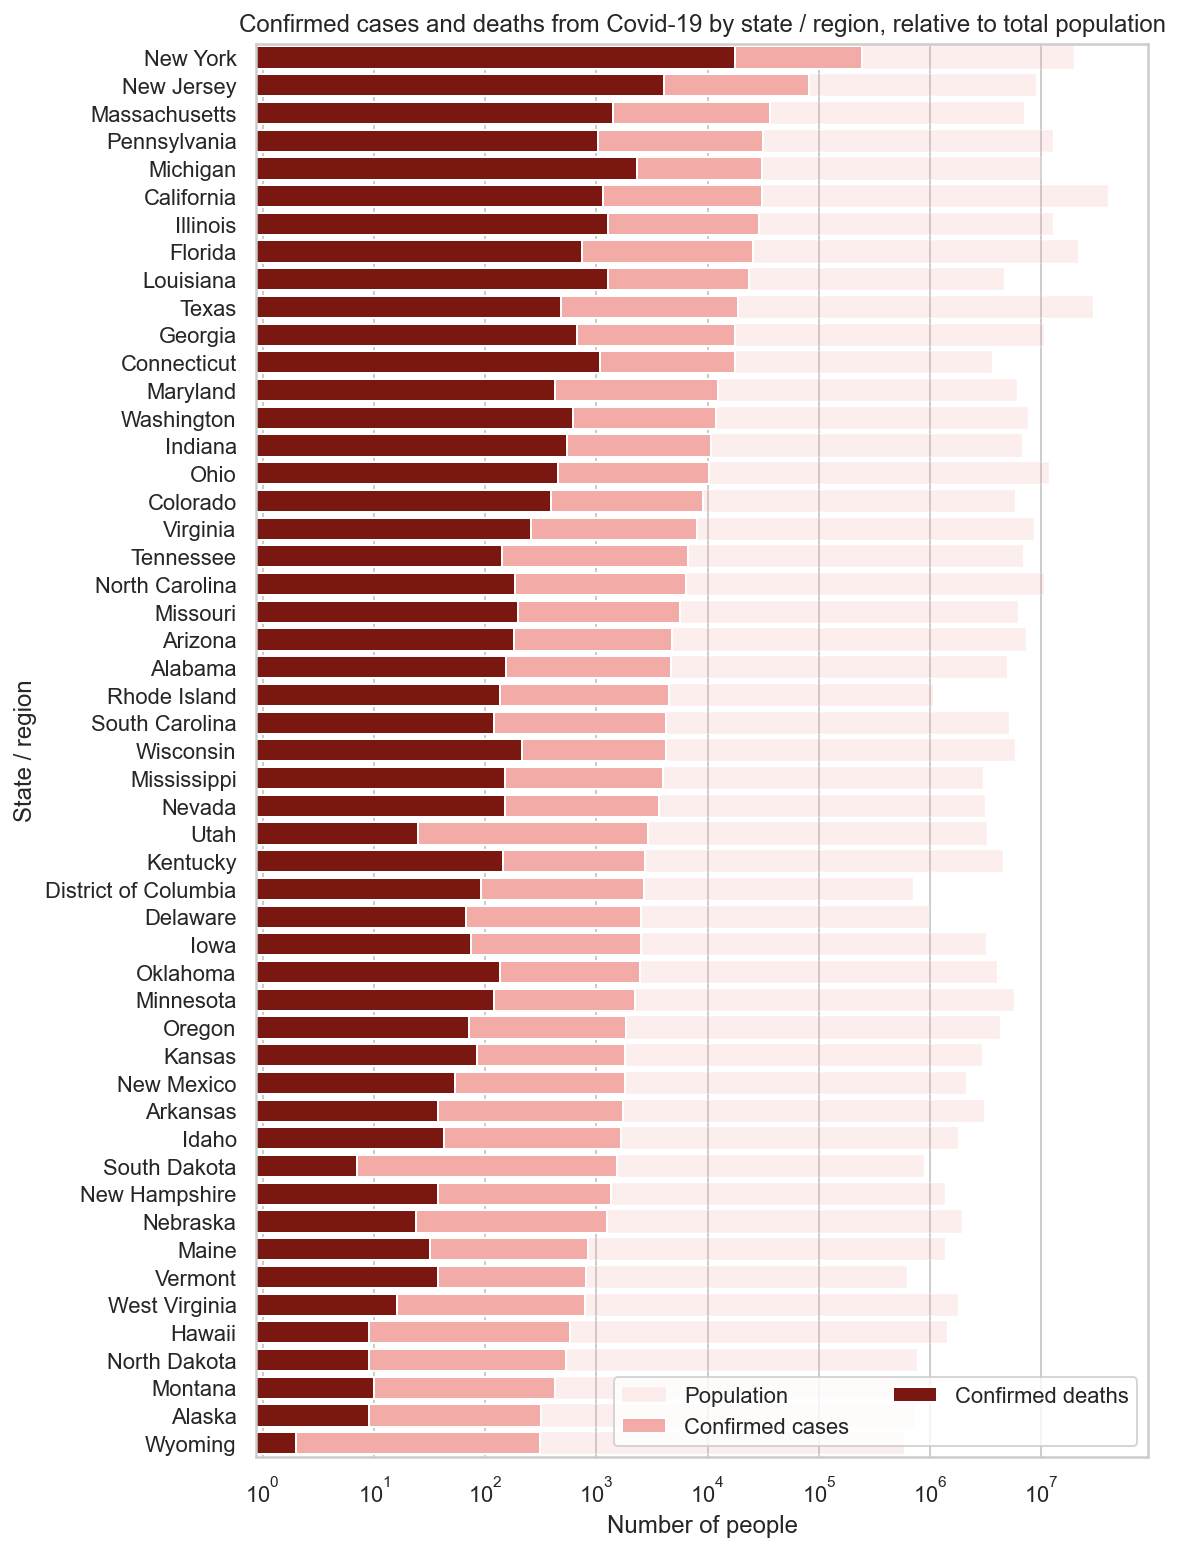

In [25]:
# Visualizing through a stacked barchart the differences between total population, confirmed cases, and deaths
f, ax = plt.subplots(figsize=(8, 13))

sns.set_color_codes('pastel')
sns.barplot(y='Province_State', x='Population', data=us_only, ci=None, label='Population', color='r', alpha=0.2)
sns.barplot(y='Province_State', x='Confirmed', data=us_only, ci=None, label='Confirmed cases', color='r')

sns.set_color_codes('dark')
sns.barplot(y='Province_State', x='Deaths', data=us_only.sort_values('Confirmed', ascending=False), ci=None, label='Confirmed deaths', color='r')

ax.legend(ncol = 2, loc = 'lower right')
sns.despine(right=False, top=False)

plt.xlabel('Number of people')
plt.ylabel('State / region')
plt.title('Confirmed cases and deaths from Covid-19 by state / region, relative to total population')
plt.xscale('log')
plt.show()

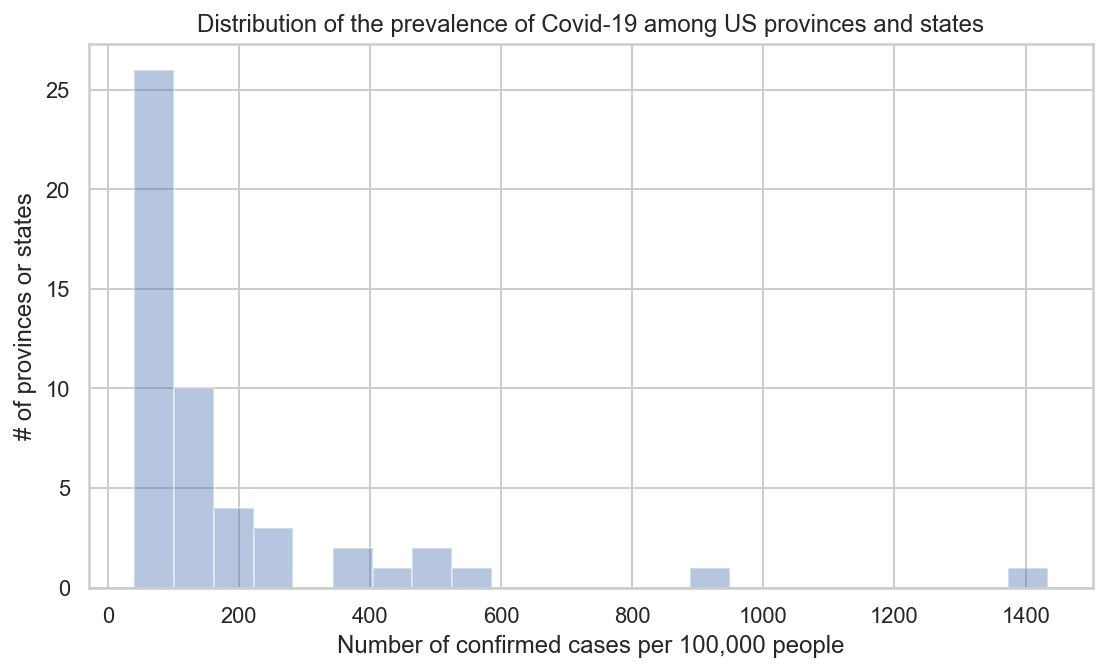

In [26]:
# Creating a histogram to see the distribution of incident rates
plt.subplots(figsize=(9, 5))
sns.distplot(us_only.Incident_Rate, kde=False)
plt.title('Distribution of the prevalence of Covid-19 among US provinces and states')
plt.xlabel('Number of confirmed cases per 100,000 people')
plt.ylabel('# of provinces or states');

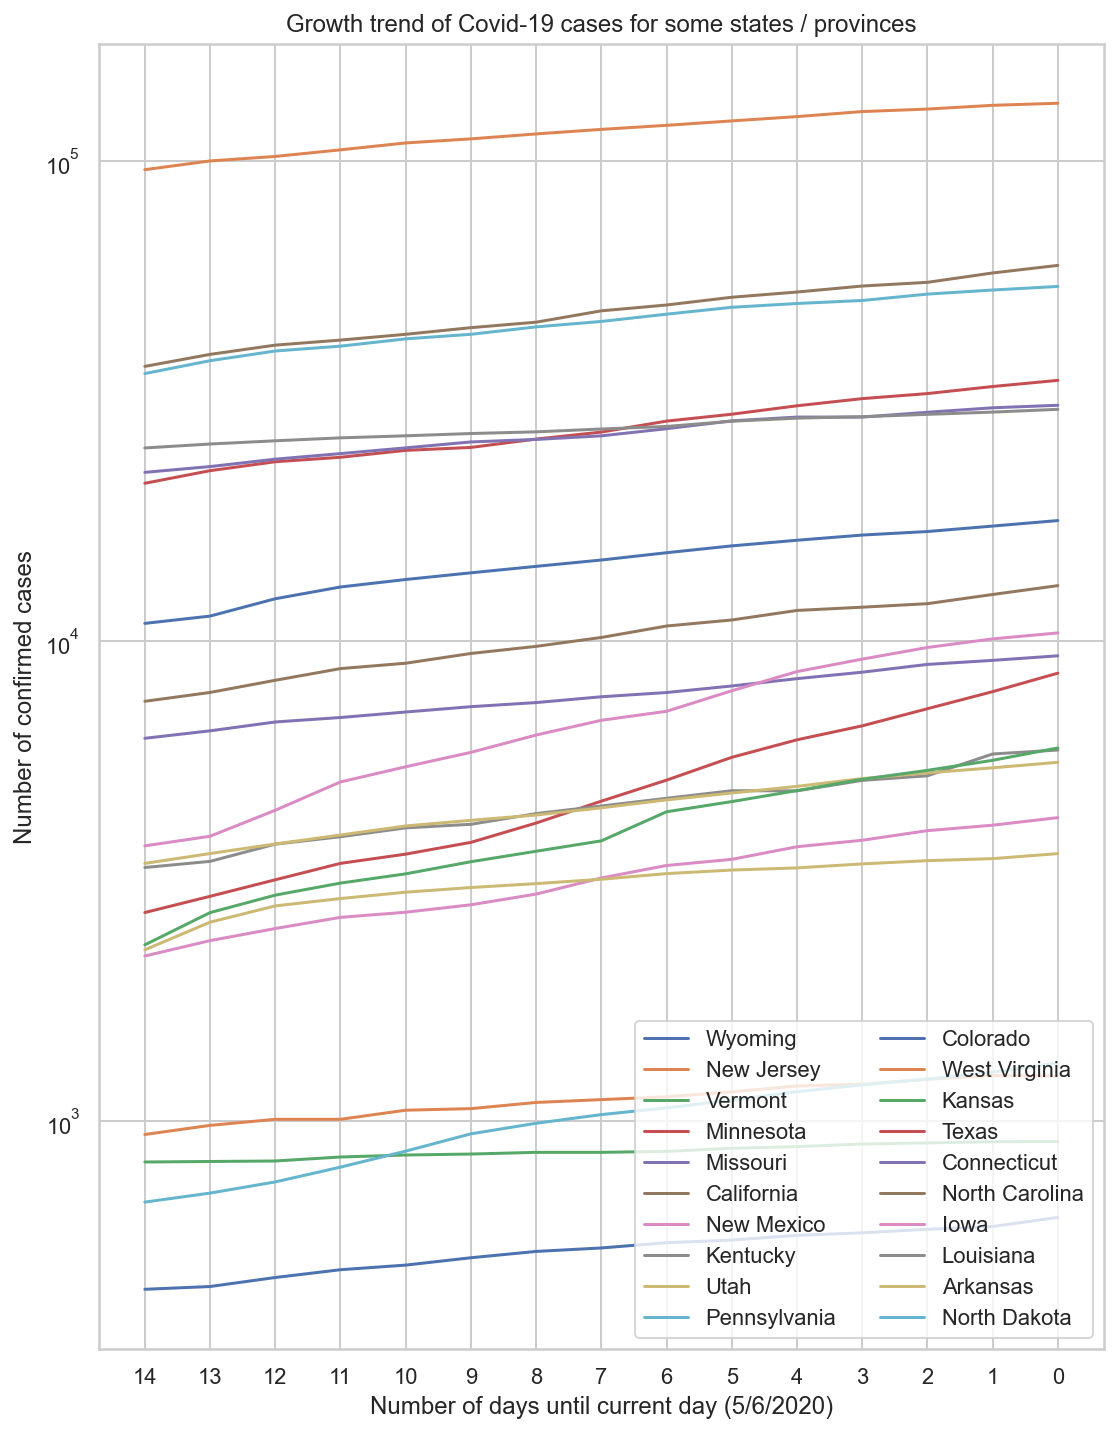

In [27]:
# By examining the rough trends of the growth in the number of confirmed cases by selecting 20 states, we see that it's not unreasonable to model it.
tmp = confirmed.rename(columns={'Current_Confirmed': '0'}).sort_values('Current_Date', ascending=False).iloc[:20]

_, ax = plt.subplots(figsize=(9, 12))

for i in range(tmp.shape[0]):
    plt.plot([x.split()[0] for x in tmp.columns[2:][::-1]], tmp.iloc[i, 2:][::-1], label=tmp.iloc[i, 0])

plt.xlabel('Number of days until current day (5/6/2020)')
plt.ylabel('Number of confirmed cases')
plt.title('Growth trend of Covid-19 cases for some states / provinces')

ax.legend(ncol = 2, loc = 'lower right')

plt.yscale('log')

Now let's get serious. We would like to determine what information is useful for forecasting besides the data for the last 14 days. We start with the state's population. Below we are creating functions to standize our code and also finding the correlation between to features.

In [28]:
def std_units(X):
    return (X - np.mean(X)) / np.std(X)

def correlation(X, Y):
    return np.mean(std_units(X) * std_units(Y))

We merge the information we have into a clean table so that subsequent analysis will only need to use this single table.

In [29]:
# The combined dataframe that relates state_info and Covid-19 stats
combined = us_only[['Province_State', 'Confirmed', 'Population', 'Population_Density']].merge(states_info, left_on='Province_State', right_on='State')
combined.head()

Province_State  Confirmed  Population  Population_Density  MedianAge2010  \
0       New York     241712  19453561.0          357.109885      40.254839   
1     New Jersey      81420   8882190.0         1018.366200      39.728571   
2  Massachusetts      36372   6892503.0          653.008337      40.707143   
3   Pennsylvania      31652  12801989.0          277.953645      41.792537   
4       Michigan      30791   9986857.0          103.159353      42.743373   

   Smokers_Percentage  FracMale2017 stay at home >50 gatherings  \
0           15.375752      0.498441   2020-03-22     2020-03-16   
1           14.068380      0.489605   2020-03-21     2020-03-16   
2           13.270095      0.485667   2020-03-24     2020-03-17   
3           17.939587      0.500598   2020-03-29     2020-03-23   
4           17.566229      0.503930   2020-03-24     2020-03-24   

  >500 gatherings entertainment/gym restaurant dine-in  #Hospitals  \
0      2020-03-13        2020-03-16         2020-03-16       165.0   
1      2020-03-16        2020-03-16         2020-03-16        64.0   
2      2020-03-17        2020-03-17         2020-03-17        58.0   
3      2020-03-23        2020-03-17         2020-03-17       162.0   
4      2020-03-24        2020-03-16         2020-03-16       130.0   

   #EligibleforMedicare2018  #ICU_beds  
0                 3736013.0     3952.0  
1                 1681194.0     1822.0  
2                 1371986.0     1326.0  
3                 2803888.0     3169.0  
4                 2134497.0     2423.0

It would be useful to be able to compute the correlation so that we have a quantitative measure of how related the two variables are. First let's see the correlation between population size and confirmed cases

0.42593321357776326

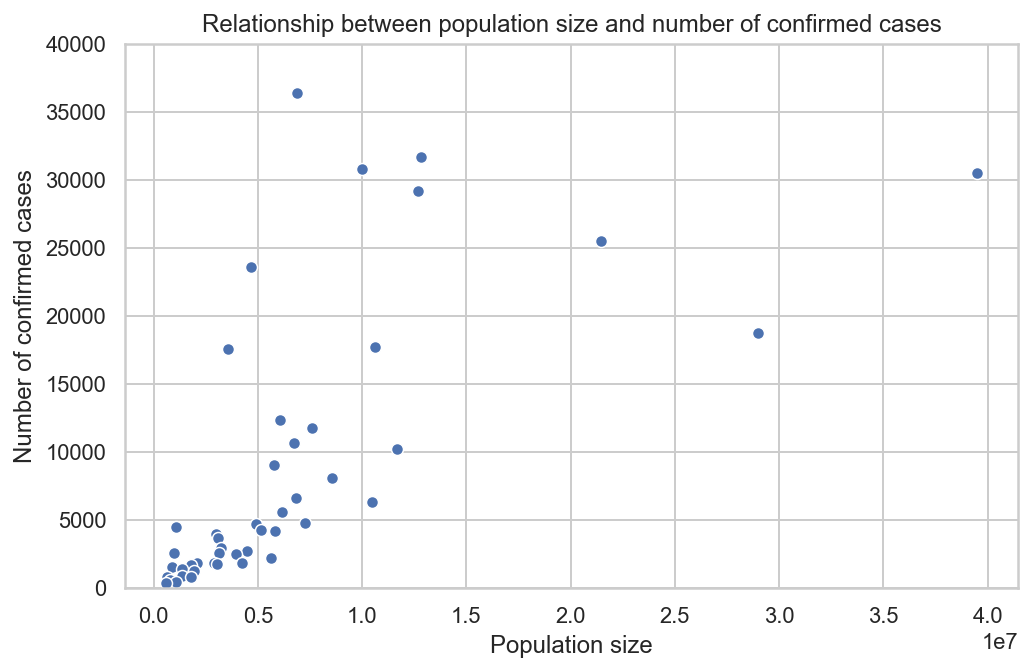

In [30]:
# Plotting and calculating the Correlation Coefficient between popluation size and number of confirmed cases
plt.subplots(figsize=(8, 5))
sns.scatterplot(x='Population', y='Confirmed', data=combined)
plt.xlabel('Population size')
plt.ylabel('Number of confirmed cases')
plt.title('Relationship between population size and number of confirmed cases');
plt.xscale('linear')
plt.ylim(0, 40000)

correlation(us_only.Population, us_only.Confirmed)

There is a positive correlation between the population size of the province or state and the number of confirmed cases of r = 0.42. Population size could be a good feature to use.

Next let's see if Gender and confirmed cases has a high correlation


-0.08952854036344808

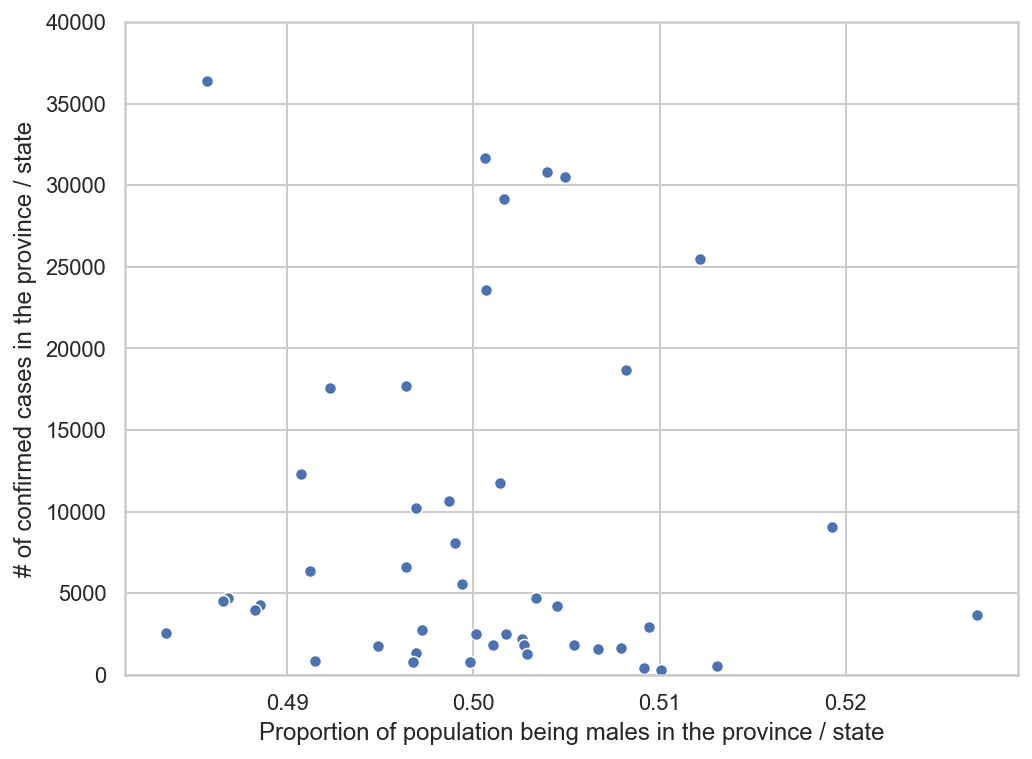

In [31]:
# Correlation between gender and number of confirmed cases
plt.subplots(figsize=(8, 6))
sns.scatterplot(x='FracMale2017', y='Confirmed', data=combined)
plt.xlabel('Proportion of population being males in the province / state')
plt.ylabel('# of confirmed cases in the province / state')
plt.ylim(0, 40000)
correlation(combined['FracMale2017'], combined['Confirmed'])

Correlation Coefficient is low indicating we should drop columns related to median age and the fraction of males.

Next, we examine the median age of the population for each state.

-0.07698367162945081

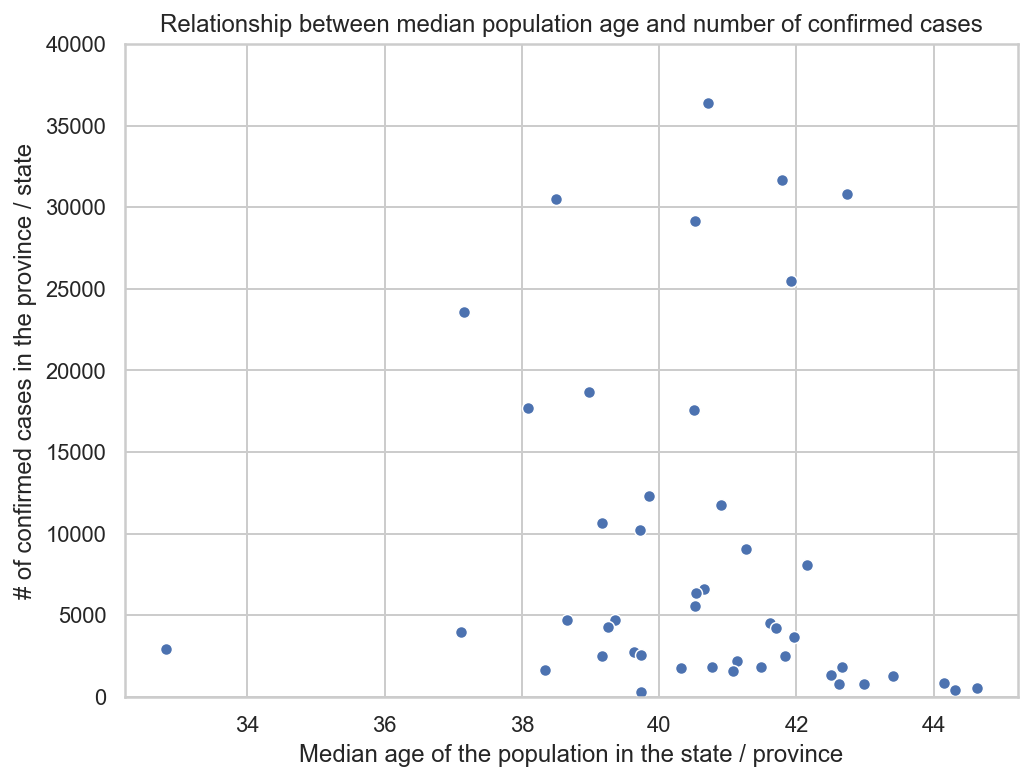

In [32]:
# The correlation between median age and the number of confirmed cases 
plt.subplots(figsize=(8, 6))
sns.scatterplot(x='MedianAge2010', y='Confirmed', data=combined)
plt.title('Relationship between median population age and number of confirmed cases')
plt.xlabel('Median age of the population in the state / province')
plt.ylabel('# of confirmed cases in the province / state')
plt.ylim(0, 40000)

correlation(combined['MedianAge2010'], combined['Confirmed'])

Once again we get a pretty low coefficient for Median age vs number of confirmed cases.

Next let's try number of hospitals

0.26373780173176015

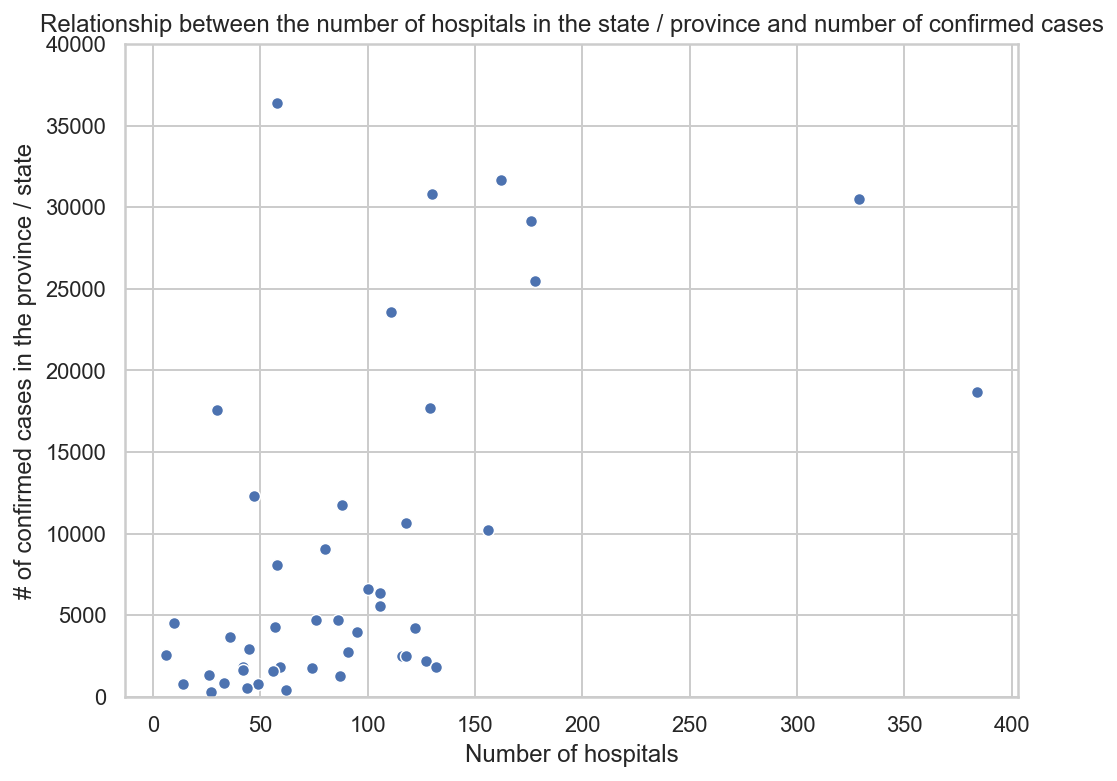

In [33]:
# Correlation between Number of hospitals in the state vs confirmed cases
plt.subplots(figsize=(8, 6))
sns.scatterplot(x='#Hospitals', y='Confirmed', data=combined)
plt.title('Relationship between the number of hospitals in the state / province and number of confirmed cases')
plt.xlabel('Number of hospitals')
plt.ylabel('# of confirmed cases in the province / state')
plt.ylim(0, 40000)

correlation(combined['#Hospitals'], combined['Confirmed'])

There appears to be a loose relationship between the number of hospitals in the region and the number of confirmed cases. This could be a potential feature to use


0.4555534079581572

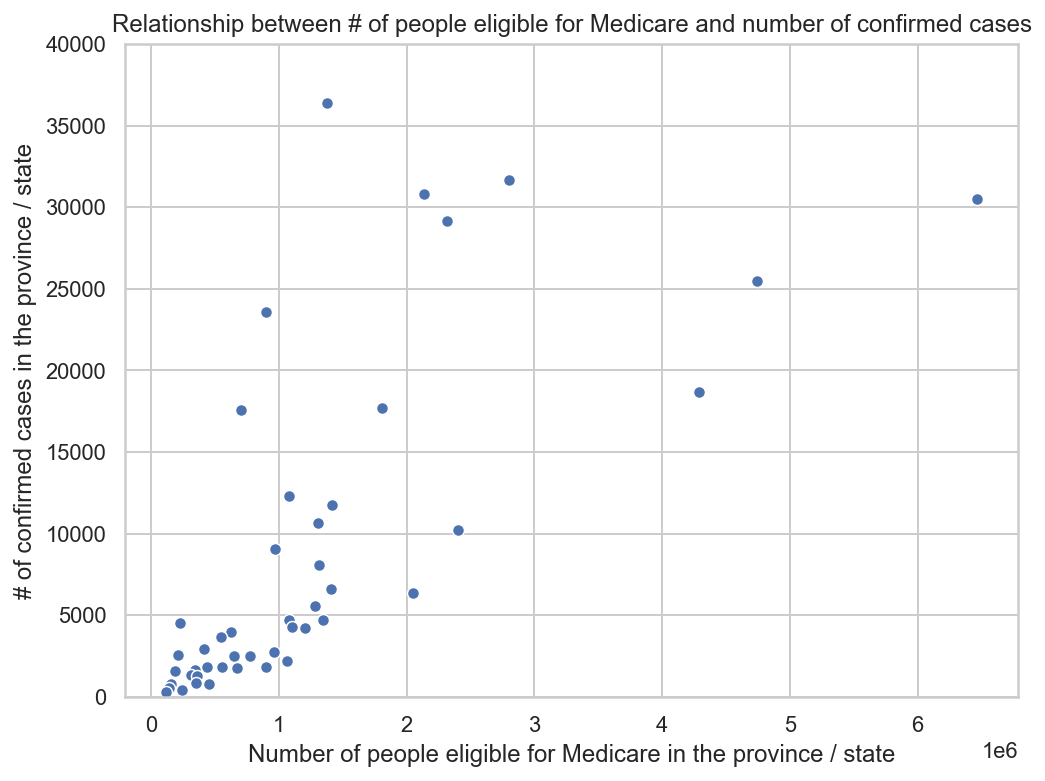

In [34]:
# People Eligible for Medicare vs Number of confirmed cases Correlation
plt.subplots(figsize=(8, 6))
sns.scatterplot(x='#EligibleforMedicare2018', y='Confirmed', data=combined)
plt.title('Relationship between # of people eligible for Medicare and number of confirmed cases')
plt.xlabel('Number of people eligible for Medicare in the province / state')
plt.ylabel('# of confirmed cases in the province / state')
plt.ylim(0, 40000)

correlation(combined['#EligibleforMedicare2018'], combined['Confirmed'])

Surprisingly, there is a noticeable correlation between the proportion of population eligible for Medicare and the number of confirmed cases. Furthermore, this scatterplot looks very similar to the one we had for the total population. We decided to visualize the dependence between these two features to get an in-depth look.

0.9834817276189406

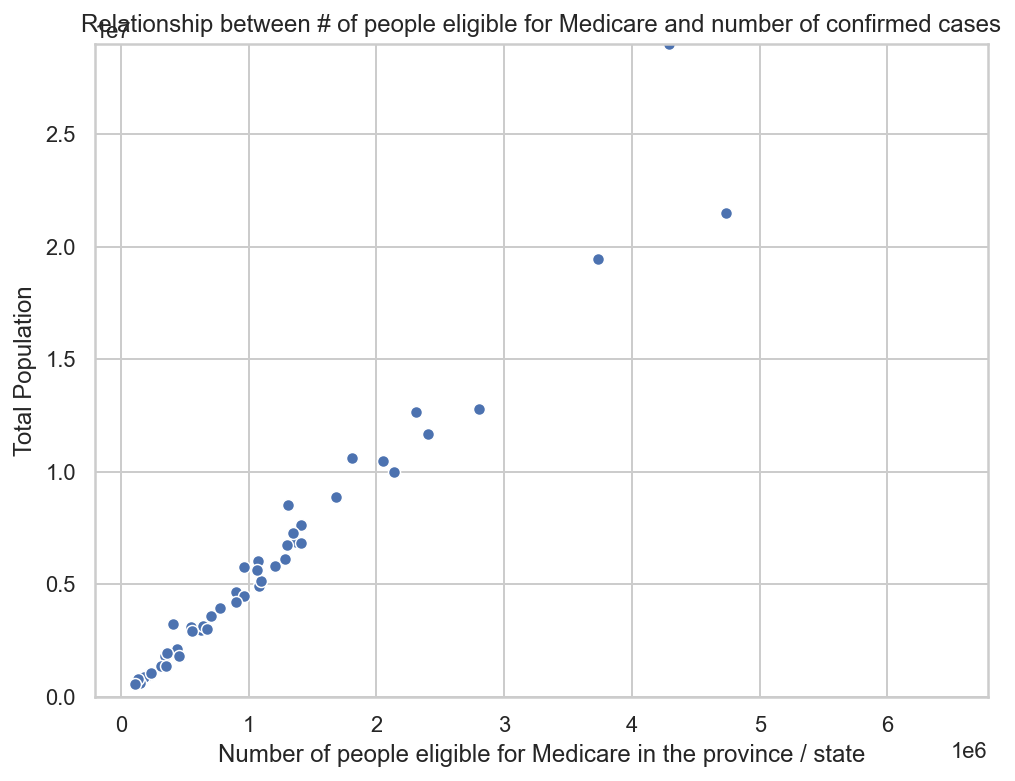

In [35]:
# Correlation between total population and number of people eligible for Medicare 
plt.subplots(figsize=(8, 6))
sns.scatterplot(x='#EligibleforMedicare2018', y='Population', data=combined)
plt.title('Relationship between # of people eligible for Medicare and number of confirmed cases')
plt.xlabel('Number of people eligible for Medicare in the province / state')
plt.ylabel('Total Population')
plt.ylim(0, 29000000)

correlation(combined['#EligibleforMedicare2018'], combined['Population'])

#Unfortunately, the population size and the # of people eligible for Medicare are so closely correlated that they should almost be treated as linearly dependent. Therefore, we decided not to use this feature.

Here's the relationship between population density and confirmed cases.

0.3869447211727093

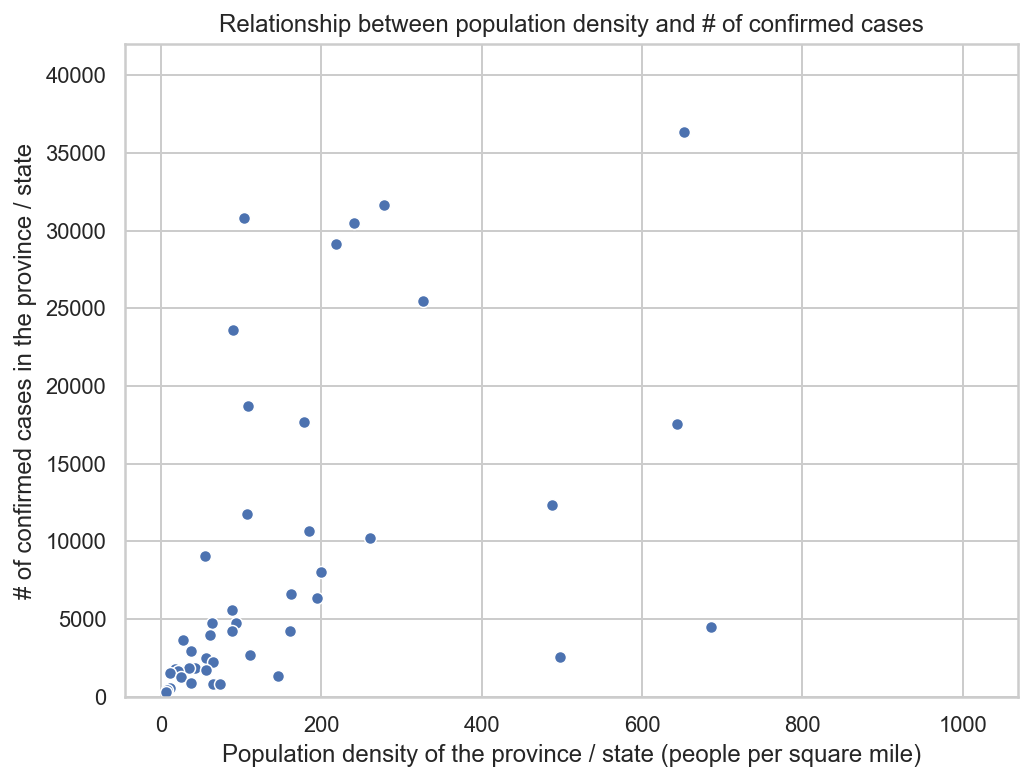

In [36]:
# Correlation between population density and confirmed cases
plt.subplots(figsize=(8, 6))
sns.scatterplot(x='Population_Density', y='Confirmed', data=combined)
plt.title('Relationship between population density and # of confirmed cases')
plt.xlabel('Population density of the province / state (people per square mile)')
plt.ylabel('# of confirmed cases in the province / state')
plt.ylim(0, 42000)

correlation(combined['Population_Density'], combined['Confirmed'])

There is a positive correlation between population density and the number of confirmed cases.

Could the number of hospital beds relate to the number of confirmed cases?

0.3970844604495041

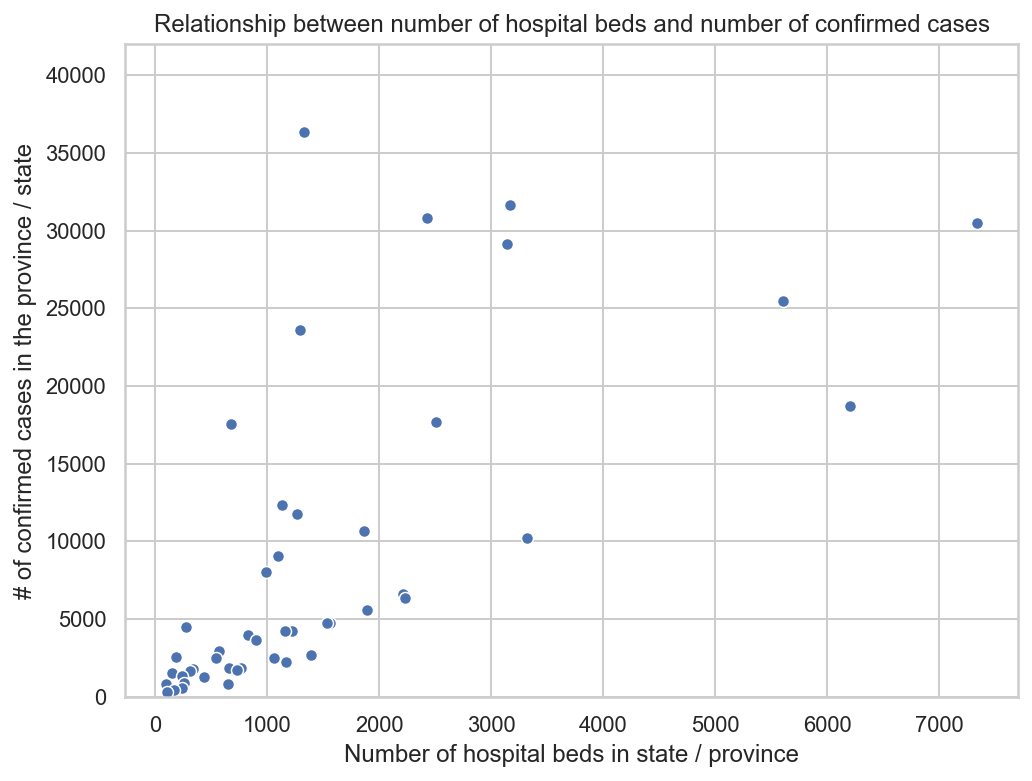

In [37]:
# Number of ICU_beds vs confirmed cases
plt.subplots(figsize=(8, 6))
sns.scatterplot(x='#ICU_beds', y='Confirmed', data=combined)
plt.title('Relationship between number of hospital beds and number of confirmed cases')
plt.xlabel('Number of hospital beds in state / province')
plt.ylabel('# of confirmed cases in the province / state')
plt.ylim(0, 42000)

correlation(combined['#ICU_beds'], combined['Confirmed'])

There is a positive correlation between population density and the number of confirmed cases. A possible explanation for this is perhaps places with more hospital beds are more willing to diagnose patients because they are not afraid of having no place to accept them.

In the end, we decided to remove these uninformative features, as they could mislead the model and cause overfitting instead of producing real results.

In [38]:
# Removing columns/ Features that have low correlation and that we deemed to be not as helpful for creating our model
states_info.drop(columns=['FracMale2017', 'MedianAge2010', '#EligibleforMedicare2018', 'Smokers_Percentage'], inplace=True)
states_info.head()

stay at home >50 gatherings >500 gatherings entertainment/gym  \
State                                                                      
Alabama      2020-04-03     2020-03-20      2020-03-13        2020-03-28   
Arizona      2020-03-31     2020-03-17      2020-03-17        2020-03-19   
Arkansas            NaN     2020-03-26      2020-03-26        2020-03-19   
California   2020-03-19     2020-03-19      2020-03-19        2020-03-15   
Colorado     2020-03-25     2020-03-24      2020-03-13        2020-03-17   

           restaurant dine-in  #Hospitals  #ICU_beds  
State                                                 
Alabama            2020-03-19        86.0     1533.0  
Arizona            2020-03-19        76.0     1559.0  
Arkansas           2020-03-19        74.0      732.0  
California         2020-03-15       329.0     7338.0  
Colorado           2020-03-20        80.0     1095.0

## Forecasting

Now that we a better idea of our features and columns through EDA, prior to actually building models, we will need to prepare our complete features matrix.

## Creating a forecast model

In [39]:
# Note: if time allows, we could also do a similar forecast for deaths

We combine the `confirmed` table with the information we managed to extract from `abridged_counties.csv` to obtain the full feature matrix:

In [40]:
# Getting all the all of the features from confirmed and abridged_counties
features = confirmed.merge(states_info, left_on='Province_State', right_on='State')
features.head()

Province_State Current_Date  Current_Confirmed  1 day(s) ago  2 day(s) ago  \
0        Alabama   2020-02-05                  0             0             0   
1        Alabama   2020-02-06                  0             0             0   
2        Alabama   2020-02-07                  0             0             0   
3        Alabama   2020-02-08                  0             0             0   
4        Alabama   2020-02-09                  0             0             0   

   3 day(s) ago  4 day(s) ago  5 day(s) ago  6 day(s) ago  7 day(s) ago  ...  \
0             0             0             0             0             0  ...   
1             0             0             0             0             0  ...   
2             0             0             0             0             0  ...   
3             0             0             0             0             0  ...   
4             0             0             0             0             0  ...   

   12 day(s) ago  13 day(s) ago  14 day(s) ago  stay at home  >50 gatherings  \
0              0              0              0    2020-04-03      2020-03-20   
1              0              0              0    2020-04-03      2020-03-20   
2              0              0              0    2020-04-03      2020-03-20   
3              0              0              0    2020-04-03      2020-03-20   
4              0              0              0    2020-04-03      2020-03-20   

   >500 gatherings  entertainment/gym restaurant dine-in #Hospitals #ICU_beds  
0       2020-03-13         2020-03-28         2020-03-19       86.0    1533.0  
1       2020-03-13         2020-03-28         2020-03-19       86.0    1533.0  
2       2020-03-13         2020-03-28         2020-03-19       86.0    1533.0  
3       2020-03-13         2020-03-28         2020-03-19       86.0    1533.0  
4       2020-03-13         2020-03-28         2020-03-19       86.0    1533.0  

[5 rows x 24 columns]

Since it's not very useful to have dates inside a feature table, it's better to convert them into numerical data. We can encode them by specifying instead whether on the current day, the policies were already in place (AKA we will compare current date with the data specificed in >50 and >500 gatherings). We will also remove irrelevant columns so that the resulting dataframe is ready to be fed into a regression model.

In [41]:
# Creating and running a function to "hot-one encode" dates >50 and >500 gatherings
def format_dates_to_boolean(features, date_columns):
    tmp = features.loc[:]
    for column_name in date_columns:
        tmp[column_name] = (tmp['Current_Date'] >= tmp[column_name]).astype(int) # This automatically handles NaN values
    features_formatted = tmp.merge(us_only[['Province_State', 'Population', 'Population_Density']], on='Province_State')
    features_formatted.drop(columns=['Province_State', 'Current_Date'], inplace=True)
    return features_formatted

features_formatted = format_dates_to_boolean(features, ['stay at home', '>50 gatherings', '>500 gatherings','entertainment/gym', 'restaurant dine-in'])
features_formatted

Current_Confirmed  1 day(s) ago  2 day(s) ago  3 day(s) ago  \
0                     0             0             0             0   
1                     0             0             0             0   
2                     0             0             0             0   
3                     0             0             0             0   
4                     0             0             0             0   
...                 ...           ...           ...           ...   
4411                579           566           559           545   
4412                586           579           566           559   
4413                596           586           579           566   
4414                604           596           586           579   
4415                631           604           596           586   

      4 day(s) ago  5 day(s) ago  6 day(s) ago  7 day(s) ago  8 day(s) ago  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
4411           536           520           502           491           473   
4412           545           536           520           502           491   
4413           559           545           536           520           502   
4414           566           559           545           536           520   
4415           579           566           559           545           536   

      9 day(s) ago  ...  14 day(s) ago  stay at home  >50 gatherings  \
0                0  ...              0             0               0   
1                0  ...              0             0               0   
2                0  ...              0             0               0   
3                0  ...              0             0               0   
4                0  ...              0             0               0   
...            ...  ...            ...           ...             ...   
4411           453  ...            309             1               1   
4412           473  ...            313             1               1   
4413           491  ...            317             1               1   
4414           502  ...            443             1               1   
4415           520  ...            447             1               1   

      >500 gatherings  entertainment/gym  restaurant dine-in  #Hospitals  \
0                   0                  0                   0        86.0   
1                   0                  0                   0        86.0   
2                   0                  0                   0        86.0   
3                   0                  0                   0        86.0   
4                   0                  0                   0        86.0   
...               ...                ...                 ...         ...   
4411                1                  1                   1        27.0   
4412                1                  1                   1        27.0   
4413                1                  1                   1        27.0   
4414                1                  1                   1        27.0   
4415                1                  1                   1        27.0   

      #ICU_beds  Population  Population_Density  
0        1533.0   4903185.0           93.531179  
1        1533.0   4903185.0           93.531179  
2        1533.0   4903185.0           93.531179  
3        1533.0   4903185.0           93.531179  
4        1533.0   4903185.0           93.531179  
...         ...         ...                 ...  
4411      102.0    578759.0            5.916692  
4412      102.0    578759.0            5.916692  
4413      10

Great. This will be the feature matrix that we will feed into a regression model.

To evaluate the accuracy of our model, we will be using rmse.

In [42]:
# This will be used to evaluate model accuracy
def rmse_score(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X)) ** 2))

Spliting Training and Testing Data to be used to modeling + creating a Linear Regression Model

In [43]:
# Spliting Train and Test datay with a 0.9 split
train, test = train_test_split(features_formatted, train_size = 0.9, random_state=0)
X_train = train.drop(columns='Current_Confirmed')
Y_train = train['Current_Confirmed']
X_test = test.drop(columns='Current_Confirmed')
Y_test = test['Current_Confirmed']

model1 = LinearRegression()
model1.fit(X_train, Y_train)

model1_loss = np.mean(cross_val_score(model1, X_train, Y_train, scoring=rmse_score, cv=5))
model1_loss

251.84169687456946

That's not incredibly bad, but not great either. Let's take a look our the coefficients for our models

In [44]:
model1.coef_

array([ 1.51841921e+00, -3.67153506e-01, -8.39055404e-02, -3.34039956e-02,
        1.44626397e-01, -2.84970210e-02,  1.46109530e-02, -2.44136852e-01,
        1.39377429e-01, -8.95351536e-02, -1.36375855e-01,  9.77200711e-02,
        4.50867145e-02,  2.18882962e-02, -9.98027803e+00,  1.83032216e+01,
        1.77648613e-01,  1.25159386e+01,  1.01111065e+01, -2.24869811e-02,
        1.58407030e-03,  1.84759519e-06,  4.69342452e-02])

Overall, it looks like there are no seriously useless parameter, so this is a good sign. The smallest coefficient is the second last one, which corresponds to the population size. However, populations are fairly large values, so it makes sense that the coefficient is small. The fact that it's positive tells as that the higher the population of a state is, the more likely it is to have high number of confirmed cases.

## Improving the Model

Now that we have finished our first version of our model, let's see if we can go back into our data to find even better features and see if we can improve our next model

Would knowing the history of the last three or more weeks help the accuracy of our forecasting model? Let's try it out.

In [45]:
# Similar to what we did earlier were we calculate how many confirmed cases there are each day, we have expanded it to cover 
# a greater range
last_3_weeks = confirmed_by_date.rename(columns={'Confirmed': 'Current_Confirmed', 'Date': 'Current_Date'})

for i in range(1, 22):
    last_3_weeks = last_3_weeks.merge(confirmed_by_date, on='Province_State')
    last_3_weeks = last_3_weeks[(last_3_weeks['Current_Date'] - last_3_weeks['Date']).dt.days == i]\
                .drop(columns='Date')\
                .rename(columns={'Confirmed': '{} day(s) ago'.format(i)})
    print('added day {}'.format(i))

last_3_weeks

added day 1


added day 2


added day 3


added day 4


added day 5


added day 6


added day 7


added day 8


added day 9


added day 10


added day 11


added day 12


added day 13


added day 14


added day 15


added day 16


added day 17


added day 18


added day 19


added day 20


added day 21


Province_State Current_Date  Current_Confirmed  1 day(s) ago  \
106           Alabama   2020-02-12                  0             0   
213           Alabama   2020-02-13                  0             0   
320           Alabama   2020-02-14                  0             0   
427           Alabama   2020-02-15                  0             0   
534           Alabama   2020-02-16                  0             0   
...               ...          ...                ...           ...   
519162        Wyoming   2020-05-02                579           566   
519269        Wyoming   2020-05-03                586           579   
519376        Wyoming   2020-05-04                596           586   
519483        Wyoming   2020-05-05                604           596   
519590        Wyoming   2020-05-06                631           604   

        2 day(s) ago  3 day(s) ago  4 day(s) ago  5 day(s) ago  6 day(s) ago  \
106                0             0             0             0             0   
213                0             0             0             0             0   
320                0             0             0             0             0   
427                0             0             0             0             0   
534                0             0             0             0             0   
...              ...           ...           ...           ...           ...   
519162           559           545           536           520           502   
519269           566           559           545           536           520   
519376           579           566           559           545           536   
519483           586           579           566           559           545   
519590           596           586           579           566           559   

        7 day(s) ago  ...  12 day(s) ago  13 day(s) ago  14 day(s) ago  \
106                0  ...              0              0              0   
213                0  ...              0              0              0   
320                0  ...              0              0              0   
427                0  ...              0              0              0   
534                0  ...              0              0              0   
...              ...  ...            ...            ...            ...   
519162           491  ...            317            313            309   
519269           502  ...            443            317            313   
519376           520  ...            447            443            317   
519483           536  ...            453            447            443   
519590           545  ...            473            453            447   

        15 day(s) ago  16 day(s) ago  17 day(s) ago  18 day(s) ago  \
106                 0              0              0              0   
213                 0              0              0              0   
320                 0              0              0              0   
427                 0              0              0              0   
534                 0              0              0              0   
...               ...            ...            ...            ...   
519162            305            296            287            282   
519269            309            305            296            287   
519376            313            309            305            296   
519483            317            313            309            305   
519590            443            317            313            309   

        19 day(s) ago  20 day(s) ago  21 day(s) ago  
106                 0              0              0  
213                 0              0              0  
320                 0              0              0  
427                 0              0              0  
534                 0              0              0  
...               ...            ...            ...  
519162            275            270            261  
519269            282          

In [46]:
# Now let's recreate our features matrix like we did before by merging 
features_3_weeks = last_3_weeks.merge(states_info, left_on='Province_State', right_on='State')
features2_formatted = format_dates_to_boolean(features_3_weeks, ['stay at home', '>50 gatherings', '>500 gatherings','entertainment/gym', 'restaurant dine-in'])
features2_formatted

Current_Confirmed  1 day(s) ago  2 day(s) ago  3 day(s) ago  \
0                     0             0             0             0   
1                     0             0             0             0   
2                     0             0             0             0   
3                     0             0             0             0   
4                     0             0             0             0   
...                 ...           ...           ...           ...   
4075                579           566           559           545   
4076                586           579           566           559   
4077                596           586           579           566   
4078                604           596           586           579   
4079                631           604           596           586   

      4 day(s) ago  5 day(s) ago  6 day(s) ago  7 day(s) ago  8 day(s) ago  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
4075           536           520           502           491           473   
4076           545           536           520           502           491   
4077           559           545           536           520           502   
4078           566           559           545           536           520   
4079           579           566           559           545           536   

      9 day(s) ago  ...  21 day(s) ago  stay at home  >50 gatherings  \
0                0  ...              0             0               0   
1                0  ...              0             0               0   
2                0  ...              0             0               0   
3                0  ...              0             0               0   
4                0  ...              0             0               0   
...            ...  ...            ...           ...             ...   
4075           453  ...            261             1               1   
4076           473  ...            270             1               1   
4077           491  ...            275             1               1   
4078           502  ...            282             1               1   
4079           520  ...            287             1               1   

      >500 gatherings  entertainment/gym  restaurant dine-in  #Hospitals  \
0                   0                  0                   0        86.0   
1                   0                  0                   0        86.0   
2                   0                  0                   0        86.0   
3                   0                  0                   0        86.0   
4                   0                  0                   0        86.0   
...               ...                ...                 ...         ...   
4075                1                  1                   1        27.0   
4076                1                  1                   1        27.0   
4077                1                  1                   1        27.0   
4078                1                  1                   1        27.0   
4079                1                  1                   1        27.0   

      #ICU_beds  Population  Population_Density  
0        1533.0   4903185.0           93.531179  
1        1533.0   4903185.0           93.531179  
2        1533.0   4903185.0           93.531179  
3        1533.0   4903185.0           93.531179  
4        1533.0   4903185.0           93.531179  
...         ...         ...                 ...  
4075      102.0    578759.0            5.916692  
4076      102.0    578759.0            5.916692  
4077      10

In [47]:
train2, test2 = train_test_split(features2_formatted, train_size = 0.9, random_state=0)
X_train2 = train2.drop(columns='Current_Confirmed')
Y_train2 = train2['Current_Confirmed']
X_test2 = test2.drop(columns='Current_Confirmed')
Y_test2 = test2['Current_Confirmed']

model2 = LinearRegression()
model2.fit(X_train2, Y_train2)

model2_loss = np.mean(cross_val_score(model2, X_train2, Y_train2, scoring=rmse_score, cv=5))
model2_loss

278.04183134883397

Surprisingly, the cross validation loss went up. One explanation is that as we increased the number of previous days to include in the training data, it results in less entries in the training data table, because some of the earlier dates would be eliminated from the training data due to insufficient historical data. Another reason is that perhaps the additional information doesn't really help to improve the model. Out of curiosity, we decided to build a third model only the last 7 days.

In [48]:
# Doing the same thing as above but only getting the last 7 day's worth of data
features3_formatted = features2_formatted.drop(columns=[str(i) + ' day(s) ago' for i in range(8, 22)])

train3, test3 = train_test_split(features3_formatted, train_size = 0.9, random_state=0)
X_train3 = train3.drop(columns='Current_Confirmed')
Y_train3 = train3['Current_Confirmed']
X_test3 = test3.drop(columns='Current_Confirmed')
Y_test3 = test3['Current_Confirmed']

model3 = LinearRegression()
model3.fit(X_train3, Y_train3)

model3_loss = np.mean(cross_val_score(model3, X_train3, Y_train3, scoring=rmse_score, cv=5))
model3_loss

259.15799423956634

Well, didn't do much better either. In the end, we decided to stick with using 2 weeks of historical data for our model.

Now that we've finalized our model (i.e. `model1`), we should do some analysis on it. First, how well does it do on the test data?

In [49]:
# Restoring the previous training set and test set from the random state
train, test = train_test_split(features_formatted, train_size = 0.9, random_state=0)
X_train = train.drop(columns='Current_Confirmed')
Y_train = train['Current_Confirmed']
X_test = test.drop(columns='Current_Confirmed')
Y_test = test['Current_Confirmed']

rmse_score(model1, X_test, Y_test)

188.78755132966901

It seemed that the model performed performed considerably better on the test set! This could be due to random chance, but at least, we probably didn't overfit too much.

To figure out what was important in the training data that helped the model to predict, we will do some principal component analysis.

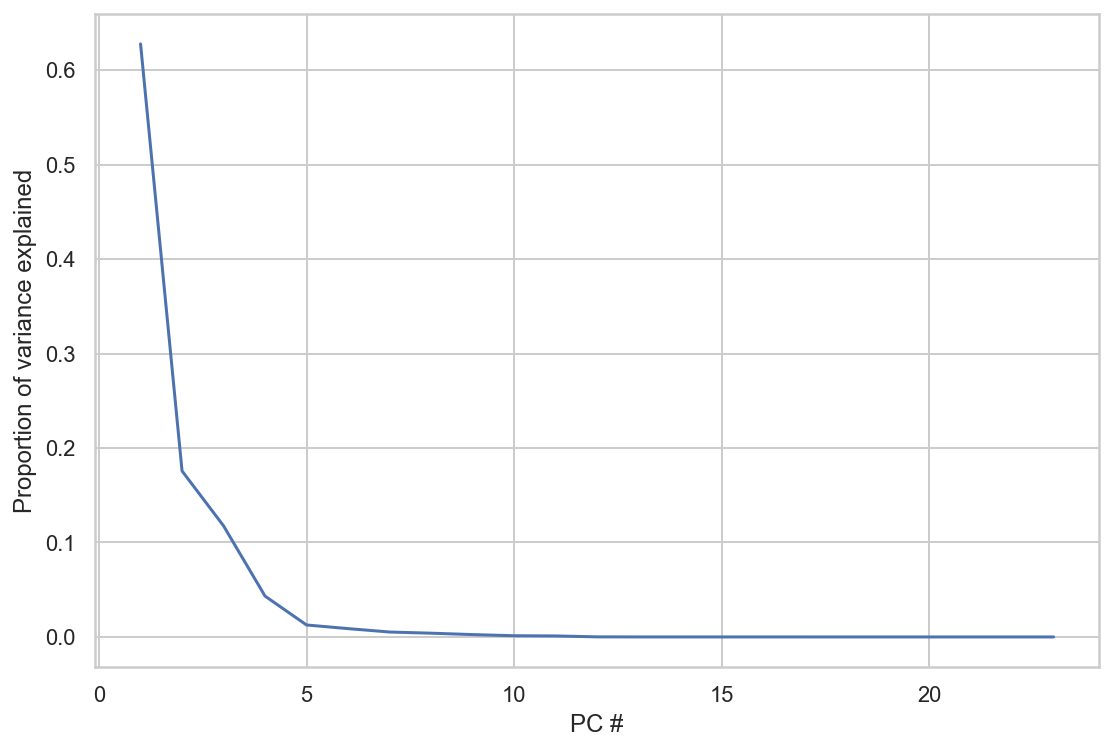

In [50]:
features_normalized = (X_train - X_train.mean()) / np.std(X_train)
u, s, vt = np.linalg.svd(features_normalized, full_matrices=False)
plt.subplots(figsize=(9, 6))
plt.plot(np.arange(1, features_normalized.shape[1] + 1), s ** 2 / sum(s ** 2) )
plt.xlabel('PC #')
plt.ylabel('Proportion of variance explained');

As shown, the scree plot is steep, and it tells us that the vast majority of variance in the training data is captured by the first 4 principal components, and that the dataset is low rank. If time allowed, we could adequately approximate the dataset using just 4 columns.

Here are the eigenvector coefficients corresponding to the first 4 principal components. As we can see, the first eigenvector weighs all of the past 14 days almost equally, and the second principal component focuses on the various policies, with restrictions on '>500 gatherings' as the most significant factor. This is not to say that '>500 gatherings' restrictions is the most effective measure. Instead, it suggests that this had been a popular policy for county governments during Covid-19.

In [51]:
pd.DataFrame(vt.T[:, :5], columns=['pc {}'.format(i) for i in range(5)], index=features_normalized.columns)

pc 0      pc 1      pc 2      pc 3      pc 4
1 day(s) ago        0.259678 -0.033444  0.015120 -0.013883 -0.022185
2 day(s) ago        0.260269 -0.036362  0.018025 -0.009210 -0.018981
3 day(s) ago        0.260745 -0.039201  0.020832 -0.004600 -0.015443
4 day(s) ago        0.261099 -0.041998  0.023537  0.000010 -0.011548
5 day(s) ago        0.261329 -0.044671  0.026168  0.004425 -0.007478
6 day(s) ago        0.261432 -0.047262  0.028706  0.008832 -0.003235
7 day(s) ago        0.261399 -0.049764  0.031205  0.013152  0.001173
8 day(s) ago        0.261215 -0.052240  0.033635  0.017592  0.005746
9 day(s) ago        0.260885 -0.054510  0.035897  0.021716  0.010147
10 day(s) ago       0.260414 -0.056608  0.037921  0.025754  0.014358
11 day(s) ago       0.259798 -0.058570  0.039864  0.029539  0.018510
12 day(s) ago       0.258991 -0.060511  0.041747  0.033607  0.022796
13 day(s) ago       0.257994 -0.062366  0.043603  0.037415  0.027142
14 day(s) ago       0.256807 -0.064064  0.045343  0.041297  0.031315
stay at home        0.095223  0.396867 -0.011099 -0.046734 -0.856213
>50 gatherings      0.085495  0.452994 -0.008810 -0.000345  0.014886
>500 gatherings     0.083583  0.449449 -0.016636  0.006149  0.070544
entertainment/gym   0.082670  0.446249 -0.000398  0.018938  0.278818
restaurant dine-in  0.079474  0.445568  0.012146  0.042084  0.409891
#Hospitals          0.049033 -0.020378 -0.564270  0.210514  0.061142
#ICU_beds           0.069287 -0.019242 -0.577755 -0.042179 -0.019676
Population          0.072355 -0.019524 -0.573495 -0.053590 -0.019074
Population_Density  0.059604 -0.003882 -0.055730 -0.969309  0.085130

## Conclusion

In the end, we were able to get a somewhat accuracte model with a rmse_score of 188 on the testing data. However, given the magnitude of the impacts COVID-19 has had on the world, if we want this model to be helpful, a higher accuracy needs to be achieved. By conducting more research and collecting more data to be used, we believe it is possible to increase the accuraacy of the model. A more in-depth analysis of our work and thought process can be found in the project report.

Regardless, through this project, we have gained a better understanding of COVID-19, found possible insights on correlating features, and were to  able exercise our data science knowledge obtained through this class.  